In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("train2.csv", delimiter=',')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
temp = pd.DataFrame(index=df_train.columns)
temp['data_type'] = df_train.dtypes
temp['null_count'] = df_train.isnull().sum()
temp['unique_count'] = df_train.nunique()
temp

,data_type,null_count,unique_count
Loan_ID,object,0,614
Gender,object,13,2
Married,object,3,2
Dependents,object,15,4
Education,object,0,2
Self_Employed,object,32,2
ApplicantIncome,int64,0,505
CoapplicantIncome,float64,0,287
LoanAmount,float64,22,203
Loan_Amount_Term,float64,14,10


In [6]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
# imputing gender null values with mode
df_train['Gender'].mode()
df_train['Gender'].fillna( value = (df_train['Gender'].mode()[0]),  inplace=True)

In [8]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
# checking relationship between gender and marriage
married_mode = pd.crosstab(df_train['Gender'],df_train['Married'])
married_mode

Married,No,Yes
Gender,,
Female,80,31
Male,133,367


In [10]:
# imputing values for Married

# creating a list of all those index where Outlet_Size is null
a=list(df_train[df_train['Married'].isnull()].index)

# imputing Outlet_Type based on the Outlet_Type categories
for i in a:
    if (df_train['Gender'].iloc[i]=='Male'):
        df_train['Married'].iloc[i]='Yes'
    elif (df_train['Gender'].iloc[i]=='Female'):
        df_train['Married'].iloc[i]='No'

/Users/satwikpai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
# checking relationship between gender and marriage
# from the previous married_mode you can see that one of the null values for married was female and 2 were male
married_mode1 = pd.crosstab(df_train['Gender'],df_train['Married'])
married_mode1

Married,No,Yes
Gender,,
Female,81,31
Male,133,369


In [12]:
# checking relationship between marriage and dependents
dependents_mode = pd.crosstab(df_train['Married'],df_train['Dependents'])
dependents_mode

Dependents,0,1,2,3+
Married,,,,
No,171,23,8,7
Yes,174,79,93,44


In [13]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
# best to apply 0 to those null values in dependents
# imputing dependents null values with mode
df_train['Dependents'].mode()
df_train['Dependents'].fillna( value = (df_train['Dependents'].mode()[0]),  inplace=True)

In [15]:
# checking relationship between anything and Self_Employed
# so best is to fill mode only
married_mode1 = pd.crosstab(df_train['Loan_Status'], df_train['Self_Employed'])
married_mode1

Self_Employed,No,Yes
Loan_Status,,
N,157,26
Y,343,56


In [16]:
# best to apply 0 to those null values in dependents
# imputing dependents null values with mode
df_train['Self_Employed'].mode()
df_train['Self_Employed'].fillna( value = (df_train['Self_Employed'].mode()[0]),  inplace=True)

In [17]:
# best to apply mean to those null values in loanamount
# imputing loanamount null values with mean
df_train['LoanAmount'].mean()
df_train['LoanAmount'].fillna( value = (df_train['LoanAmount'].mean()),  inplace=True)

In [18]:
# best to apply mean to those null values in loanamount_term
# imputing loanamount_term null values with mean
df_train['Loan_Amount_Term'].mean()
df_train['Loan_Amount_Term'].fillna( value = (df_train['Loan_Amount_Term'].mean()),  inplace=True)

In [19]:
# best to apply mean to those null values in credit_history
# imputing credit_history null values with mean
df_train['Credit_History'].mode()
df_train['Credit_History'].fillna( value = (df_train['Credit_History'].mode()[0]),  inplace=True)

In [20]:
df_train = df_train.astype({'Credit_History': 'object'})

In [21]:
df_train['HouseIncome'] = (df_train['ApplicantIncome']+df_train['CoapplicantIncome'])
df_train['AverageHouseIncome'] = (df_train['ApplicantIncome']+df_train['CoapplicantIncome'])/2
df_train['Ratio_Inc_Loan'] = (df_train['HouseIncome']/df_train['LoanAmount'])

In [22]:
df_train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [23]:
a = list(df_train.index)

for i in a:
    if (df_train['Loan_Status'].iloc[i]=='Y'):
        df_train['Loan_Status'].iloc[i]='1'
    else:
        df_train['Loan_Status'].iloc[i]='0'

/Users/satwikpai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
df_train = df_train.astype({'Loan_Status': 'int'})

In [25]:
df_train.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status             int64
HouseIncome           float64
AverageHouseIncome    float64
Ratio_Inc_Loan        float64
dtype: object

In [26]:
temp = pd.DataFrame(index=df_train.columns)
temp['data_type'] = df_train.dtypes
temp['null_count'] = df_train.isnull().sum()
temp['unique_count'] = df_train.nunique()
temp

,data_type,null_count,unique_count
Loan_ID,object,0,614
Gender,object,0,2
Married,object,0,2
Dependents,object,0,4
Education,object,0,2
Self_Employed,object,0,2
ApplicantIncome,int64,0,505
CoapplicantIncome,float64,0,287
LoanAmount,float64,0,204
Loan_Amount_Term,float64,0,11


df_train=df_train.drop(['HouseIncome'], axis=1)

In [27]:
df_train=df_train.drop(['Loan_ID'], axis=1)

In [28]:
df_train = pd.get_dummies(df_train)
len(list(df_train.columns))

25

In [29]:
x = df_train.drop(['Loan_Status'],axis=1)
y = df_train['Loan_Status']

In [30]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.3, random_state=1)

In [31]:
train_y.dtypes

dtype('int64')

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc
from sklearn.metrics import roc_auc_score

In [33]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred_train = logreg.predict_proba(train_x)
pred_valid = logreg.predict_proba(valid_x)

In [35]:
roc_auc_score(train_y, pred_train[:,1])

0.7945591474973103

In [36]:
roc_auc_score(valid_y, pred_valid[:,1])

0.7669222633527234

# KNN

In [82]:
x = df_train.drop(['Loan_Status'],axis=1)
y = df_train['Loan_Status']

In [83]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [84]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [85]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,HouseIncome,AverageHouseIncome,Ratio_Inc_Loan,Gender_Female,Gender_Male,Married_No,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.198860,0.74359,0.055394,0.055394,0.072496,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.054830,0.036192,0.172214,0.74359,0.058435,0.058435,0.092370,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.035250,0.000000,0.082489,0.74359,0.019583,0.019583,0.086824,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.030093,0.056592,0.160637,0.74359,0.043980,0.043980,0.075687,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.072356,0.000000,0.191027,0.74359,0.057292,0.057292,0.079274,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [86]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.3, random_state=1)

In [87]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [88]:
# Creating instance of KNN
clf = KNN(n_neighbors = 11)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(valid_x)
k = f1_score(test_predict, valid_y)
print('Test F1 Score    ', k )

Test F1 Score     0.8413793103448276


In [354]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(valid_x)
        tmp = f1_score(tmp,valid_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [355]:
#Defining K range
k = range(1, 50, 1)

In [356]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

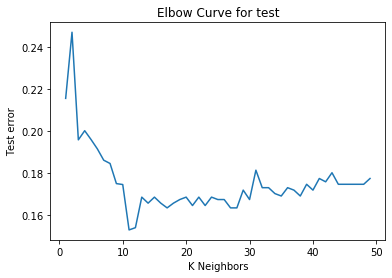

In [357]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

## DT

In [61]:
X = df_train.drop(['Loan_Status'],axis=1)
y = df_train['Loan_Status']

In [62]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [63]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [64]:
#creating the decision tree function
# instance creation
dt_model = DecisionTreeClassifier(random_state=10, max_leaf_nodes=6)

In [65]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [66]:
#checking the training score
dt_model.score(X_train, y_train)

0.8326086956521739

In [67]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.8376623376623377

In [567]:
# this loop is used to change the max depth automatically 
# so basically, in each loop the max_depth gets incremented and a model is created
# the model's training accuracy and validation accuracy is stored in a list
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_leaf_nodes=depth+1, max_depth=depth,random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [568]:
# create a dataframe that shows for each model that was generated in the loop (each value of depth)...
#... what were the training accuracy and validation accuracy
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.804348,0.824675
1,2,0.819565,0.837662
2,3,0.819565,0.837662
3,4,0.826087,0.837662
4,5,0.832609,0.837662


No handles with labels found to put in legend.


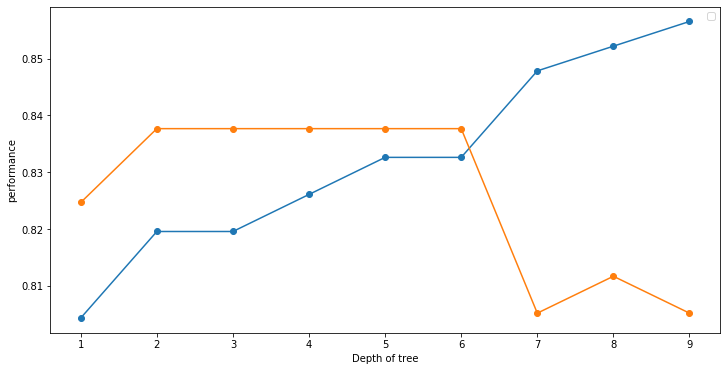

In [569]:
# plot this training accuracy and validation accuracy against the max_depth values
# you will get a graph and you can see what the best value of max_depth is 
# here, it looks like best value of max_depth is 8
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

## Random forest

In [37]:
x = df_train.drop(['Loan_Status'],axis=1)
y = df_train['Loan_Status']

In [578]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.3, random_state=1)

In [580]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 4, random_state=2)

In [581]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [582]:
pred_train_rf = rf.predict(train_x)
pred_valid_rf = rf.predict(valid_x)

In [583]:
roc_auc_score(train_y, pred_train_rf)

0.7430580460064553

In [584]:
roc_auc_score(valid_y, pred_valid_rf)

0.6846245372818615

## Testing data

In [38]:
df_test = pd.read_csv("test2.csv", delimiter=',')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
df_test.shape

(367, 12)

In [40]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [41]:
temp = pd.DataFrame(index=df_test.columns)
temp['data_type'] = df_test.dtypes
temp['null_count'] = df_test.isnull().sum()
temp['unique_count'] = df_test.nunique()
temp

,data_type,null_count,unique_count
Loan_ID,object,0,367
Gender,object,11,2
Married,object,0,2
Dependents,object,10,4
Education,object,0,2
Self_Employed,object,23,2
ApplicantIncome,int64,0,314
CoapplicantIncome,int64,0,194
LoanAmount,float64,5,144
Loan_Amount_Term,float64,6,12


In [42]:
df_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [43]:
# imputing gender null values with mode
df_test['Gender'].mode()
df_test['Gender'].fillna( value = (df_test['Gender'].mode()[0]),  inplace=True)

In [44]:
df_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [45]:
# best to apply 0 to those null values in dependents
# imputing dependents null values with mode
df_test['Dependents'].mode()
df_test['Dependents'].fillna( value = (df_test['Dependents'].mode()[0]),  inplace=True)

In [46]:
# best to apply 0 to those null values in dependents
# imputing dependents null values with mode
df_test['Self_Employed'].mode()
df_test['Self_Employed'].fillna( value = (df_test['Self_Employed'].mode()[0]),  inplace=True)

In [47]:
# best to apply mean to those null values in loanamount
# imputing loanamount null values with mean
df_test['LoanAmount'].mean()
df_test['LoanAmount'].fillna( value = (df_test['LoanAmount'].mean()),  inplace=True)

In [48]:
# best to apply mean to those null values in loanamount_term
# imputing loanamount_term null values with mean
df_test['Loan_Amount_Term'].mean()
df_test['Loan_Amount_Term'].fillna( value = (df_test['Loan_Amount_Term'].mean()),  inplace=True)

In [49]:
# best to apply mean to those null values in credit_history
# imputing credit_history null values with mean
df_test['Credit_History'].mode()
df_test['Credit_History'].fillna( value = (df_test['Credit_History'].mode()[0]),  inplace=True)

In [50]:
df_test = df_test.astype({'Credit_History': 'object'})

In [51]:
df_test=df_test.drop(['Loan_ID'], axis=1)

In [52]:
df_test['HouseIncome'] = (df_test['ApplicantIncome']+df_test['CoapplicantIncome'])
df_test['AverageHouseIncome'] = (df_test['ApplicantIncome']+df_test['CoapplicantIncome'])/2
df_test['Ratio_Inc_Loan'] = (df_test['HouseIncome']/df_test['LoanAmount'])

In [53]:
temp = pd.DataFrame(index=df_test.columns)
temp['data_type'] = df_test.dtypes
temp['null_count'] = df_test.isnull().sum()
temp['unique_count'] = df_test.nunique()
temp

,data_type,null_count,unique_count
Gender,object,0,2
Married,object,0,2
Dependents,object,0,4
Education,object,0,2
Self_Employed,object,0,2
ApplicantIncome,int64,0,314
CoapplicantIncome,int64,0,194
LoanAmount,float64,0,145
Loan_Amount_Term,float64,0,13
Credit_History,object,0,2


## random forest

# starting predictions

## logistic reg tests

In [54]:
df_test = pd.get_dummies(df_test)
len(list(df_test.columns))

24

In [55]:
pred_test = logreg.predict(df_test)

In [56]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [57]:
final_res1=[]
for i in list(pred_test):
    if i==1:
        final_res1.append('Y')
    else:
        final_res1.append('N')
final_res1

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [58]:
test2 = pd.read_csv("test2.csv", delimiter=',')

In [59]:
res = pd.DataFrame ({'Loan_Status':final_res1})
res

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [60]:
res.to_csv('LogReg1.csv', index=False)

## knn testing

In [89]:
df_test1 = pd.get_dummies(df_test)
len(list(df_test.columns))

24

In [90]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df_test)

In [91]:
x = pd.DataFrame(x_scaled, columns = df_test.columns)

In [92]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,HouseIncome,AverageHouseIncome,Ratio_Inc_Loan,Gender_Female,Gender_Male,Married_No,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.000000,0.157088,0.746835,0.055957,0.055957,0.081950,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.042411,0.062500,0.187739,0.746835,0.039791,0.039791,0.051511,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.068938,0.075000,0.344828,0.746835,0.071218,0.071218,0.044475,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.032263,0.106083,0.137931,0.746835,0.044172,0.044172,0.075855,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.045168,0.000000,0.095785,0.746835,0.021422,0.021422,0.062540,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [93]:
pred_test_knn = clf.predict(x)

In [94]:
pred_test_knn

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [95]:
final_res2=[]
for i in list(pred_test_knn):
    if i==1:
        final_res2.append('Y')
    else:
        final_res2.append('N')
final_res2

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [96]:
test2 = pd.read_csv("test2.csv", delimiter=',')

In [98]:
res = pd.DataFrame ({'Loan_Status':final_res2})
res

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [99]:
res.to_csv('knnres.csv', index=False)

## dt tests

In [68]:
df_test = pd.get_dummies(df_test)
len(list(df_test.columns))

24

In [69]:
pred_test_dt = dt_model.predict(df_test)

In [70]:
pred_test_dt

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [71]:
final_res3=[]
for i in list(pred_test_dt):
    if i==1:
        final_res3.append('Y')
    else:
        final_res3.append('N')
final_res3

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [72]:
test2 = pd.read_csv("test2.csv", delimiter=',')

In [73]:
res = pd.DataFrame ({'Loan_Status':final_res3})
res

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [74]:
res.to_csv('DTRes.csv', index=False)

## random forest

In [585]:
df_test = pd.get_dummies(df_test)
len(list(df_test.columns))

24

In [586]:
pred_test_rf = rf.predict(df_test)

In [587]:
pred_test_rf

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [594]:
final_res4=[]
for i in list(pred_test_rf):
    if i==1:
        final_res4.append('Y')
    else:
        final_res4.append('N')
final_res4

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [603]:
test2 = pd.read_csv("test2.csv", delimiter=',')

In [595]:
res = pd.DataFrame ({'Loan_ID':test2['Loan_ID'], 'Loan_Status':final_res4})
res

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [596]:
res.to_csv('LnShowA5.csv', index=False)

## ensemble of Log reg, KNN and RF

In [610]:
# here we check the mode of prediction of each row and use that as final prediction for that row
from statistics import mode
final_predictions = np.array([])
for i in range(0,len(df_test)):
    final_predictions = np.append(final_predictions, mode([final_res1[i], final_res2[i], final_res4[i]]))
final_predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [611]:
test2 = pd.read_csv("test2.csv", delimiter=',')

In [612]:
res = pd.DataFrame ({'Loan_ID':test2['Loan_ID'], 'Loan_Status':final_predictions})
res

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [613]:
res.to_csv('LnShowEnsemble2.csv', index=False)